In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as tkr
import matplotlib.dates as mdates
import datetime
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set_style("whitegrid")
sns.set_style("ticks")
import scipy.io as sio
import cmocean

import sys
sys.path.append('../')


from ploting import *
import data

%matplotlib inline

pd.options.display.max_columns = 999
pd.options.display.max_rows = 100

sns.set_style("whitegrid")
# plt.rcParams.update({'font.size': 32})
# sns.set_context("poster", rc={"font.size":34,"axes.titlesize":34,"axes.labelsize":34, "lines.linewidth": 2})  
# plt.rcParams['figure.figsize'] = 10, 6

from datetime import datetime
str(datetime.now())

'2017-10-20 17:12:16.619627'

In [2]:
df = data.read_data('Vansjo/VAN1_data_2017_02_28_10_55.xlsx')
plotter = ResultsPlotter(f='../IO/calibrated.mat')
results = plotter.env_getter('water', basin=1)

/Users/MarkelovIgor/git/biogeochemistry/MyLake_v2_Vansjo/Postproc_code/data.py:9: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  df = df.convert_objects(convert_numeric=True)


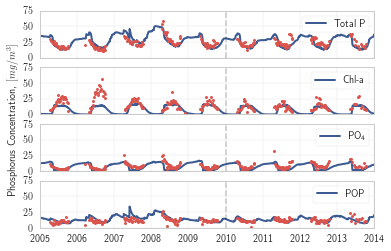

In [3]:
fig, axes = plt.subplots(4,1,sharey=True, sharex=True)

x = 'SampleDate'
env = 'water'

results = plotter.env_getter(env)
# for d,c in zip([5,], sns.color_palette()):

inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)
Chl = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl']
                                                                                      [0, 0][0:inx, :], axis=0)
PO4 = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)
Part = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)


axes[0].plot(-366 + results['days'][0, 0][0], TOTP, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
axes[1].plot(-366 + results['days'][0, 0][0], Chl, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
axes[2].plot(-366 + results['days'][0, 0][0], PO4, c=sns.xkcd_rgb["denim blue"], lw=2, label=r'PO\textsubscript{4}')
axes[3].plot(-366 + results['days'][0, 0][0], Part, c=sns.xkcd_rgb["denim blue"], lw=2, label='POP')




variable = 'TOTP'
axes[0].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

Chl = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')
axes[1].plot(-366 + Chl[:, 0], Chl[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=3)

variable = 'PO4-P'
axes[2].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)

variable = 'POP'
axes[3].plot_date(df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)][x].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values, c=sns.xkcd_rgb["pale red"], label=None, markersize=3)


for ax in axes:
    ax.grid(linestyle='-', linewidth=0.2)
    ax.set_ylim([0, 75])
    ax.set_xlim([732313 - 366, 735234 ])
    ax.plot((732313+366*4-1, 732313+366*4-1), (0, 100), 'k--', lw=0.3)
#     ax.set_ylabel(r'$[mg / m^3]$')
    ax.legend(loc=1, frameon=1)
    ax.set_xticks([], [])
    ax.set_yticks([0,25,50,75])
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=12))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(' '))    

axes[3].xaxis.set_major_locator(mdates.MonthLocator(interval=12))
axes[3].xaxis.set_major_formatter(mdates.DateFormatter('%Y'))   


fig.text(0.05, 0.5, r'Phosphorus Concentration, $[mg / m^3]$', va='center', rotation='vertical')

In [4]:
import extra_methods
import metrics

In [5]:
df['date2num'] = df.SampleDate.apply(extra_methods.convert_timestamp_to_num)

### Chl-a metrics

In [6]:
x = 'SampleDate'
env = 'water'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]
Chl_s = np.mean(results['concentrations'][0, 0]['C'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['Chl'][0, 0][0:inx, :], axis=0)
Chl_o = np.loadtxt('../obs/store_obs/Cha_aquaM_march_2017.dat', delimiter=',')

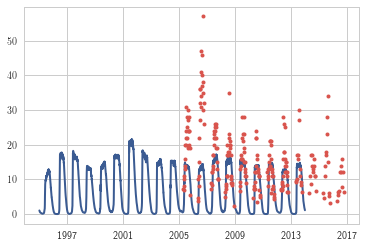

In [7]:
plt.plot(-366 + results['days'][0, 0][0], Chl_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='Chl-a')
plt.plot_date(-366+Chl_o[:, 0], Chl_o[:, 1], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [8]:
days_sim = results['days'][0, 0][0]
days_obs = Chl_o[:, 0]

In [9]:
extra_methods.run_metrics(days_sim, Chl_s, Chl_o[:, 0], Chl_o[:, 1], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
rmse                          	 11.034601238653895            	 5.911952548945375             
correlation                   	 0.49130948371410704           	 0.43543038593307665           
pc_bias                       	 -36.45318545951685            	 -14.845341583346531           
apb                           	 42.22817713537319             	 37.32183085077348             
norm_rmse                     	 0.5811715836305689            	 0.4728286995472127            
mae                           	 8.017788702144927             	 4.666486895588847             
bias                          	 -6.921301329146866            	 -1.8561681026907892           
NS                            	 -0.2506543564451911           	 -0.0421413112122595           
likelihood                    	 0.0019241484317676467         	 0.0054578160719633            
index_agreement               	 0.587120085260053

### Total P metrics

In [10]:
df['date2num'] = df.SampleDate.apply(extra_methods.convert_timestamp_to_num)
env = 'water'
x = 'SampleDate'

In [11]:
variable = 'TOTP'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]
TOTP_s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['DOP'][0, 0][0:inx, :], axis=0) + \
    np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0)

In [12]:
TOTP_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

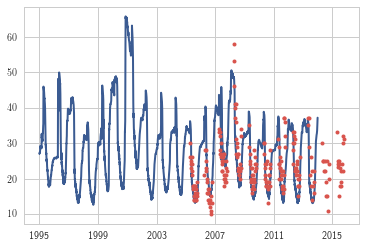

In [13]:
plt.plot(-366 + results['days'][0, 0][0], TOTP_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='Total P')
plt.plot_date(-366+TOTP_o[0, :], TOTP_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [14]:
extra_methods.run_metrics(results['days'][0, 0][0], TOTP_s, TOTP_o[0,:], TOTP_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
rmse                          	 6.540410261668743             	 7.203678658206048             
correlation                   	 0.7170517619339645            	 0.5523625684296422            
pc_bias                       	 3.367261931853157             	 -13.524489161218812           
apb                           	 22.516141894571575            	 25.367426027216414            
norm_rmse                     	 0.28255623702453714           	 0.3072004794347572            
mae                           	 5.211875945518662             	 5.948518889752881             
bias                          	 0.7794297774041488            	 -3.1714167280296257           
NS                            	 0.2894559034260338            	 -0.6025120615005919           
likelihood                    	 0.02864660096370892           	 0.0003312754652133252         
index_agreement               	 0.831643230810098

### PO4 metrics

In [15]:
variable = 'PO4-P'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]

In [16]:
PO4_s = np.mean(results['concentrations'][0, 0]['P'][0, 0][0:inx, :], axis=0)

In [17]:
PO4_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

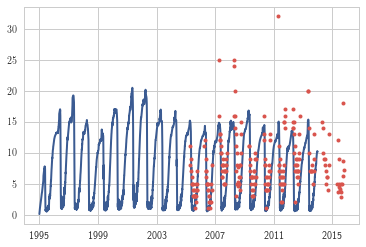

In [18]:
plt.plot(-366 + results['days'][0, 0][0], PO4_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='PO4')
plt.plot_date(-366+PO4_o[0, :], PO4_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [19]:
extra_methods.run_metrics(results['days'][0, 0][0], PO4_s, PO4_o[0,:], PO4_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
rmse                          	 5.088426351596077             	 6.332326711499636             
correlation                   	 0.6033249143332854            	 0.6365049785806278            
pc_bias                       	 -42.04784811638595            	 -54.48957140653413            
apb                           	 57.43430441680739             	 61.75528731542025             
norm_rmse                     	 0.7025440722124761            	 0.7089627870381272            
mae                           	 4.15988461990305              	 5.515869980672763             
bias                          	 -3.0454655707153817           	 -4.866909446083617            
NS                            	 -0.3030280208795708           	 -0.7116178595777434           
likelihood                    	 0.0014808484115597393         	 0.00019198577103244802        
index_agreement               	 0.701542215745289

### PP metrics

In [20]:
variable = 'POP'
results = plotter.env_getter(env)
inx = np.where(results['z'][0, 0] == 4)[0][0]

In [21]:
PP_s = np.mean(results['concentrations'][0, 0]['POP'][0, 0][0:inx, :], axis=0) + np.mean(results['concentrations'][0, 0]['PP'][0, 0][0:inx, :], axis=0)

In [22]:
PP_o = np.array([df[(np.isfinite(df[variable])) & (df['Depth2'] == 4)]['date2num'].values, df[(np.isfinite(df[variable])) & (df.Depth2 == 4)][variable].values])

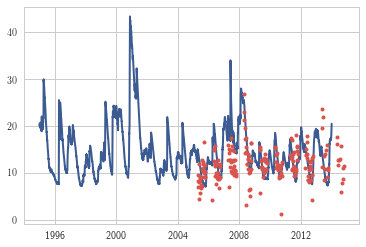

In [23]:
plt.plot(-366 + results['days'][0, 0][0], PP_s, c=sns.xkcd_rgb["denim blue"], lw=2, label='PP')
plt.plot_date(-366+PP_o[0, :], PP_o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4)

In [24]:
extra_methods.run_metrics(results['days'][0, 0][0], PP_s, PP_o[0,:], PP_o[1, :], calibration_end_date='2010-01-01')

Metrics                            During calibration            After calibration             
rmse                          	 5.218888149851942             	 3.374633852816323             
correlation                   	 0.4798641627985084            	 0.40854497055792754           
pc_bias                       	 20.669918878223477            	 -5.496135900265625            
apb                           	 34.81185917495945             	 21.71403133420588             
norm_rmse                     	 0.44725340330814717           	 0.27443568430249704           
mae                           	 4.062108817478084             	 2.670093920466844             
bias                          	 2.411921159102703             	 -0.6758394527247976           
NS                            	 -1.2003487493302805           	 -0.09816001355433213          
likelihood                    	 1.6672602632700465e-05        	 0.004124542939946867          
index_agreement               	 0.623328771815552

### Oxygen

In [25]:
variable_s = 'O2'
variable_o = 'O2'
days_sim = results['days'][0, 0][0]



Depth: 0m
Metrics                            During calibration            After calibration             
rmse                          	 1.7353797941999214            	 1.1168881722120327            
correlation                   	 0.492876028641635             	 0.547059892293495             
pc_bias                       	 -0.8959636800065773           	 3.5259250345112165            
apb                           	 12.2859186567359              	 9.09281709329544              
norm_rmse                     	 0.17013857696149415           	 0.113263455505054             
mae                           	 1.2531393744352661            	 0.8966404758095966            
bias                          	 -0.09138652117516594          	 0.3476906076714353            
NS                            	 0.23605940953631321           	 0.21617161382036032           
likelihood                    	 0.02193431546420014           	 0.019858127081132243          
index_agreement               	 0.584

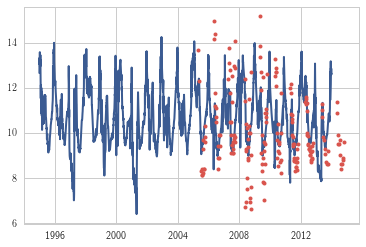



Depth: 5m
Metrics                            During calibration            After calibration             
rmse                          	 1.8186163235006547            	 0.9351567350457527            
correlation                   	 0.4672025766743988            	 0.680227643928003             
pc_bias                       	 -3.8632398725225174           	 2.0384374509996492            
apb                           	 13.841254293408134            	 7.712816177382626             
norm_rmse                     	 0.18038107874335021           	 0.09615336202836572           
mae                           	 1.3954862212311454            	 0.750123744224504             
bias                          	 -0.38949490393969854          	 0.19825188335166705           
NS                            	 0.18006693460823886           	 0.4355384394677211            
likelihood                    	 0.016578222757662138          	 0.05946854256291432           
index_agreement               	 0.596

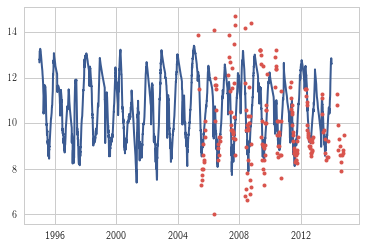



Depth: 10m
Metrics                            During calibration            After calibration             
rmse                          	 2.1355018798912537            	 1.3431501384363032            
correlation                   	 0.5274912299137715            	 0.6949722956602301            
pc_bias                       	 -3.4427792422820342           	 5.5270667975549825            
apb                           	 17.076231802753327            	 12.309294518790733            
norm_rmse                     	 0.21667463624376043           	 0.1448730813319174            
mae                           	 1.6829992540157626            	 1.1412217152396913            
bias                          	 -0.33931343656083257          	 0.5124264953869755            
NS                            	 0.25545328118080424           	 0.3850940025579478            
likelihood                    	 0.024167812476425122          	 0.04621134320049431           
index_agreement               	 0.61

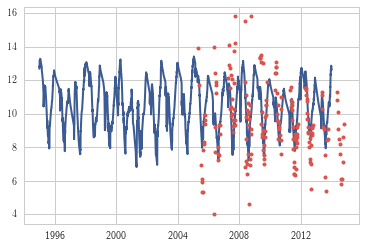



Depth: 15m
Metrics                            During calibration            After calibration             
rmse                          	 2.5106244787546315            	 1.7679241236598517            
correlation                   	 0.5616783844293697            	 0.7305002012187493            
pc_bias                       	 0.045782317710068146          	 10.845506074516608            
apb                           	 20.138686187322524            	 17.12932300816154             
norm_rmse                     	 0.26647538409130417           	 0.20141125378955474           
mae                           	 1.8973864578247788            	 1.503557661168833             
bias                          	 0.004313426845371726          	 0.9519841350310756            
NS                            	 0.2929126233664969            	 0.2902740493713709            
likelihood                    	 0.029146020801598466          	 0.028764026480114453          
index_agreement               	 0.59

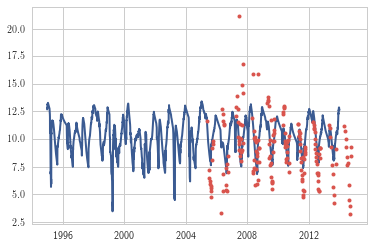



Depth: 20m
Metrics                            During calibration            After calibration             
rmse                          	 2.44659195747631              	 2.0791366738708215            
correlation                   	 0.5834931942512935            	 0.7068979916346394            
pc_bias                       	 5.1522018666981655            	 14.73669176652028             
apb                           	 21.51183770284394             	 20.7530899479168              
norm_rmse                     	 0.27221557878837854           	 0.24631117681697756           
mae                           	 1.9334194372185052            	 1.7517885694206798            
bias                          	 0.46306444717323086           	 1.2439385292722376            
NS                            	 0.29512186780395666           	 0.16346097393114734           
likelihood                    	 0.02946975897329142           	 0.015257331606974026          
index_agreement               	 0.63

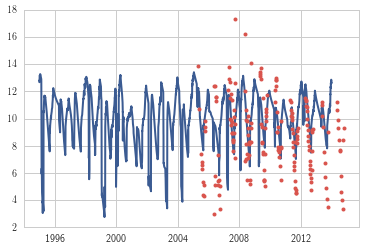



Depth: 25m
Metrics                            During calibration            After calibration             
rmse                          	 2.560742645677144             	 2.3524002289442               
correlation                   	 0.5934779967835985            	 0.5954382929200694            
pc_bias                       	 8.019810976733325             	 16.70614106471237             
apb                           	 23.413850801185966            	 23.846904122884148            
norm_rmse                     	 0.29682991080594945           	 0.28598914553725685           
mae                           	 2.01990581351201              	 1.961524190468796             
bias                          	 0.6918666627170331            	 1.37416159594364              
NS                            	 0.27269942452630236           	 0.018899645947162202          
likelihood                    	 0.02634431235053054           	 0.0074057261772958235         
index_agreement               	 0.63

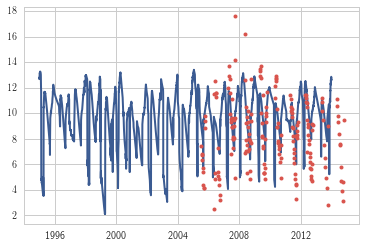



Depth: 30m
Metrics                            During calibration            After calibration             
rmse                          	 2.742782160481491             	 2.447352383748214             
correlation                   	 0.5542123589407408            	 0.6215403448179279            
pc_bias                       	 8.64825274808509              	 18.05714854546463             
apb                           	 25.2533136795014              	 25.387244546186626            
norm_rmse                     	 0.32530901388243394           	 0.3070895900788582            
mae                           	 2.129185952351496             	 2.0232380212222045            
bias                          	 0.7291612695784464            	 1.4390655679696025            
NS                            	 0.24147410164060779           	 0.06045653395922812           
likelihood                    	 0.022536264948545295          	 0.009116062329904443          
index_agreement               	 0.62

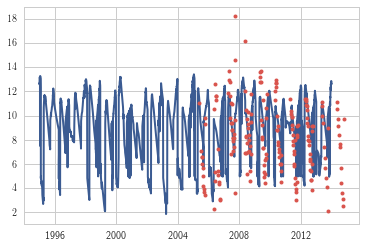



Depth: 35m
Metrics                            During calibration            After calibration             
rmse                          	 2.89116081208855              	 2.50108943987628              
correlation                   	 0.5303020190418244            	 0.6903565397045507            
pc_bias                       	 11.71748820519256             	 19.335546691532624            
apb                           	 29.085839485605               	 28.211277973862284            
norm_rmse                     	 0.37055906940647604           	 0.33058114547318024           
mae                           	 2.2693234695933584            	 2.1343906145901372            
bias                          	 0.9142170712276322            	 1.4628762803518813            
NS                            	 0.19490403782577204           	 0.19324624076613772           
likelihood                    	 0.017854855144125777          	 0.017707468200318988          
index_agreement               	 0.62

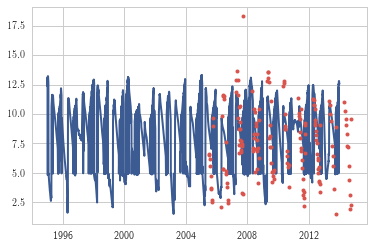



Depth: 40m
Metrics                            During calibration            After calibration             
rmse                          	 2.708041546841905             	 3.563969758309765             
correlation                   	 0.5963487724349911            	 0.46587325421696274           
pc_bias                       	 6.596898979710775             	 25.464461371433295            
apb                           	 26.725453613844454            	 42.56958883754709             
norm_rmse                     	 0.3547652681452277            	 0.5104384111160383            
mae                           	 2.040042959190126             	 2.9722827267050813            
bias                          	 0.5035632887845893            	 1.777972978973249             
NS                            	 0.3100017701759087            	 -0.09659516373289057          
likelihood                    	 0.03174591735611502           	 0.004156940971215245          
index_agreement               	 0.66

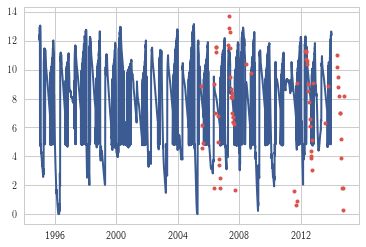

In [26]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['concentrations'][0, 0][variable_s][0, 0][inx, :]/1000
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('\n\nDepth: {}m'.format(d))
    extra_methods.run_metrics(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')
    plt.plot(-366 + results['days'][0, 0][0], s, c=sns.xkcd_rgb["denim blue"], lw=2)
    plt.plot_date(-366+o[0, :], o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4, label=variable_o)
    plt.show(block=False)

### Temperature

In [27]:
variable_o = 'Temperatur'
days_sim = results['days'][0, 0][0]



Depth: 0m
Metrics                            During calibration            After calibration             
rmse                          	 1.3793904728047819            	 1.3058644171679756            
correlation                   	 0.9762563405102955            	 0.9875949709885226            
pc_bias                       	 -6.397240622105193            	 -7.266468064596211            
apb                           	 7.440795632477032             	 7.302042859841107             
norm_rmse                     	 0.08823262343705844           	 0.08755795900551559           
mae                           	 1.1632616378961014            	 1.0890475350963023            
bias                          	 -1.0001167847702648           	 -1.083741808491206            
NS                            	 0.8863972263166948            	 0.9033629870406751            
likelihood                    	 0.5666497627927969            	 0.6168156619452099            
index_agreement               	 0.973

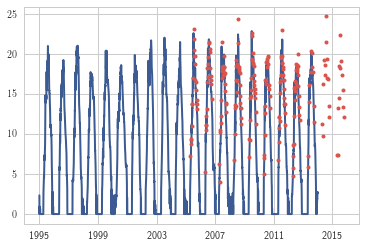



Depth: 5m
Metrics                            During calibration            After calibration             
rmse                          	 1.2344210481872002            	 1.3943545288951793            
correlation                   	 0.980264485114026             	 0.9802760324265959            
pc_bias                       	 -6.422290531260094            	 -7.594842574731697            
apb                           	 6.783738367530575             	 8.071371700818336             
norm_rmse                     	 0.08149118408216677           	 0.09660763769890217           
mae                           	 1.0275945208786523            	 1.1649548579698188            
bias                          	 -0.9728427312293418           	 -1.0961765956154217           
NS                            	 0.8853469510846418            	 0.8973242814703183            
likelihood                    	 0.5636818713149702            	 0.5984701723027094            
index_agreement               	 0.972

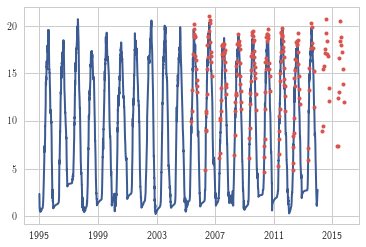



Depth: 10m
Metrics                            During calibration            After calibration             
rmse                          	 1.208660637361607             	 1.414901201831193             
correlation                   	 0.9379237722139893            	 0.9427267391132407            
pc_bias                       	 -1.6855111019166895           	 -4.530411654474841            
apb                           	 7.762734441603759             	 8.99077242240454              
norm_rmse                     	 0.0935127256306306            	 0.11215493007881422           
mae                           	 1.003340614294362             	 1.1342394575888475            
bias                          	 -0.21785387058115985          	 -0.5715383969480398           
NS                            	 0.8486395241771296            	 0.8605953090411415            
likelihood                    	 0.46916424038786875           	 0.49806561440943065           
index_agreement               	 0.96

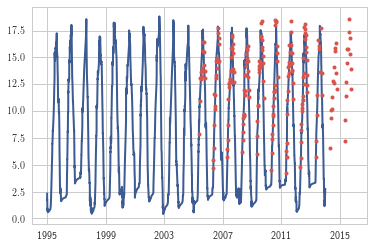



Depth: 15m
Metrics                            During calibration            After calibration             
rmse                          	 1.355580898434056             	 1.1427158392426047            
correlation                   	 0.9096709880672459            	 0.9443204082440546            
pc_bias                       	 -0.661058488645345            	 -1.2289744103722537           
apb                           	 9.863725610450565             	 8.80896380535055              
norm_rmse                     	 0.11957708819772396           	 0.1042318255816299            
mae                           	 1.1181973257964053            	 0.9657455783315925            
bias                          	 -0.07494063231189914          	 -0.13473509812570383          
NS                            	 0.7753025991063021            	 0.8341859044113238            
likelihood                    	 0.32514403686821947           	 0.43645479218506955           
index_agreement               	 0.94

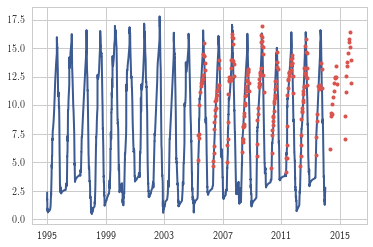



Depth: 20m
Metrics                            During calibration            After calibration             
rmse                          	 1.312785997518784             	 1.067178871300457             
correlation                   	 0.9004555205328754            	 0.9542090387209031            
pc_bias                       	 -2.501127614159884            	 -4.195756362517132            
apb                           	 9.925815990270697             	 8.68590401774838              
norm_rmse                     	 0.12145429664544671           	 0.1026074803287797            
mae                           	 1.0728704217039267            	 0.9033857196554607            
bias                          	 -0.27034410478385956          	 -0.4363836364420347           
NS                            	 0.743433239627783             	 0.8217214420753158            
likelihood                    	 0.27725051315988697           	 0.4100841938041954            
index_agreement               	 0.94

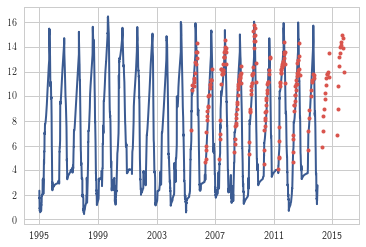



Depth: 25m
Metrics                            During calibration            After calibration             
rmse                          	 1.3701072689302873            	 1.1100205384922806            
correlation                   	 0.8843515819805917            	 0.9493068148646537            
pc_bias                       	 -3.9704419919416827           	 -6.156311310157162            
apb                           	 10.415916634841276            	 9.171029038877414             
norm_rmse                     	 0.13229152731850322           	 0.11023435033794594           
mae                           	 1.0787480788251425            	 0.9234898705398167            
bias                          	 -0.41120784862724             	 -0.6199185621067181           
NS                            	 0.6918485129342327            	 0.7852054575645917            
likelihood                    	 0.21421878308750494           	 0.34164854647992104           
index_agreement               	 0.92

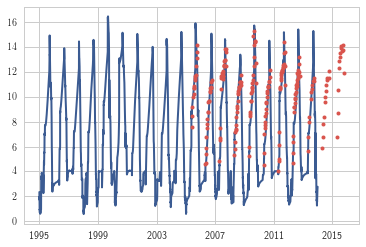



Depth: 30m
Metrics                            During calibration            After calibration             
rmse                          	 1.3983770889004072            	 1.207664429604393             
correlation                   	 0.8742387497001093            	 0.931865624690944             
pc_bias                       	 -4.819911546057947            	 -7.562871957834151            
apb                           	 11.28410903646594             	 10.266986214261438            
norm_rmse                     	 0.1411233556067147            	 0.12238248151148251           
mae                           	 1.1181309767904382            	 1.0131412516781553            
bias                          	 -0.4776001709679638           	 -0.7463005600415038           
NS                            	 0.6488825241922149            	 0.7020695500161321            
likelihood                    	 0.17280571002379802           	 0.22545104252733203           
index_agreement               	 0.92

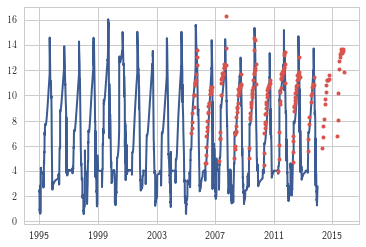



Depth: 35m
Metrics                            During calibration            After calibration             
rmse                          	 1.440075032134717             	 1.5404216260205859            
correlation                   	 0.8728342904415635            	 0.8658446307139683            
pc_bias                       	 -5.798702214192668            	 -9.665700322856994            
apb                           	 12.16514149668935             	 12.230611771831235            
norm_rmse                     	 0.14867848563724173           	 0.15736710471452692           
mae                           	 1.1782953301335028            	 1.1972196417394971            
bias                          	 -0.5616526319630116           	 -0.9461477883178345           
NS                            	 0.5520926975414121            	 0.4150193198481863            
likelihood                    	 0.10650785802386493           	 0.05366987613162549           
index_agreement               	 0.90

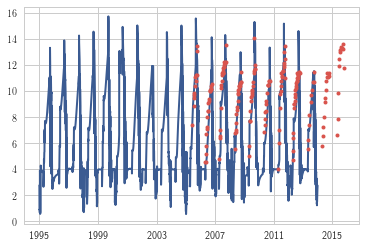



Depth: 40m
Metrics                            During calibration            After calibration             
rmse                          	 1.5117372844215549            	 2.1943373529134798            
correlation                   	 0.8516536940178085            	 0.6928719396513514            
pc_bias                       	 -7.853659816298859            	 -11.969126407353814           
apb                           	 12.5310587141467              	 17.205839535045868            
norm_rmse                     	 0.16867252193914442           	 0.22392149525882699           
mae                           	 1.1231034227546508            	 1.6861005834364324            
bias                          	 -0.7038888271170738           	 -1.172924516560643            
NS                            	 0.5046983619273221            	 -0.1672573742694914           
likelihood                    	 0.0840361521185221            	 0.0029196636101329904         
index_agreement               	 0.89

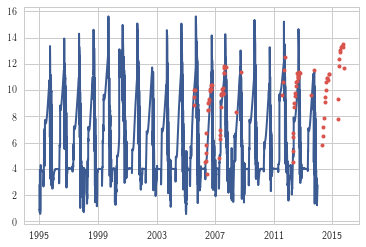

In [28]:
for d in [0,5,10,15,20,25, 30, 35, 40]:
    inx = np.where(results['z'][0, 0] == d)[0][0]
    s = results['T'][0, 0][inx, :]
    o = np.array([df[(np.isfinite(df[variable_o])) & (df['Depth1'] == d)]['date2num'].values, df[(np.isfinite(df[variable_o])) & (df.Depth1 == d)][variable_o].values])
    print('\n\nDepth: {}m'.format(d))
    extra_methods.run_metrics(results['days'][0, 0][0], s, o[0,:], o[1, :], calibration_end_date='2010-01-01')
    plt.figure()
    plt.plot(-366 + results['days'][0, 0][0], s, c=sns.xkcd_rgb["denim blue"], lw=2)
    plt.plot_date(-366+o[0, :], o[1, :], 'bo', c=sns.xkcd_rgb["pale red"], markersize=4, label=variable_o)
    plt.show(block=False)